**1. Data Understanding**

Count the number of rows and columns in the dataset.

Check the data types of each column.

Calculate the total number of missing values in each column.

Identify the unique values in categorical columns.

Calculate the average, minimum, and maximum values for numeric columns.

Determine the range (difference between minimum and maximum values) for numeric columns.

Find the most frequent values in categorical columns.

Check for duplicate rows in the dataset.

Calculate the correlation between numeric columns.

Identify the top N rows with the highest Bitcoin prices.

Calculate the average Bitcoin price per year.

Determine the number of unique dates in the dataset.

Group the data by month and calculate the average Bitcoin price for each month.

Identify the top N rows with the largest daily price changes.

Determine the earliest and latest dates in the dataset.

Calculate the average Bitcoin price for weekdays and weekends separately.

Group the data by year and calculate the total trading volume for each year.

Calculate the average Bitcoin price for each day of the week (Monday to Sunday).




In [ ]:
# Step 1: Data Understanding
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/BTC-USD.csv")


In [ ]:
# Task 1: Count the number of rows and columns in the dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 2713
Number of columns: 7


In [ ]:
# Task 2: Check the data types of each column
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [ ]:
# Task 3: Calculate the total number of missing values in each column
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Task 4: Identify the unique values in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")


Unique values in column 'Date': ['2014-09-17' '2014-09-18' '2014-09-19' ... '2022-02-17' '2022-02-18'
 '2022-02-19']


In [ ]:
# Task 5: Calculate the average, minimum, and maximum values for numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
for col in numeric_columns:
    avg_value = df[col].mean()
    min_value = df[col].min()
    max_value = df[col].max()
    print(f"Column '{col}': Average={avg_value}, Min={min_value}, Max={max_value}")

Column 'Open': Average=11311.04106888942, Min=176.897003, Max=67549.734375
Column 'High': Average=11614.2924822101, Min=211.731003, Max=68789.625
Column 'Low': Average=10975.555057374495, Min=171.509995, Max=66382.0625
Column 'Close': Average=11323.914637190566, Min=178.102997, Max=67566.828125
Column 'Adj Close': Average=11323.914637190566, Min=178.102997, Max=67566.828125
Column 'Volume': Average=14704617846.594545, Min=5914570, Max=350967941479


In [ ]:
# Task 6: Determine the range for numeric columns
for col in numeric_columns:
    range_value = df[col].max() - df[col].min()
    print(f"Range for column '{col}': {range_value}")

Range for column 'Open': 67372.837372
Range for column 'High': 68577.893997
Range for column 'Low': 66210.552505
Range for column 'Close': 67388.725128
Range for column 'Adj Close': 67388.725128
Range for column 'Volume': 350962026909


In [ ]:
# Task 7: Find the most frequent values in categorical columns
for col in categorical_columns:
    most_frequent_values = df[col].value_counts().head()
    print(f"Most frequent values in column '{col}':")
    print(most_frequent_values)


Most frequent values in column 'Date':
2014-09-17    1
2019-09-03    1
2019-08-26    1
2019-08-27    1
2019-08-28    1
Name: Date, dtype: int64


In [ ]:
# Task 8: Check for duplicate rows in the dataset
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


In [ ]:
# Task 9: Calculate the correlation between numeric columns
correlation_matrix = df[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999535  0.999103  0.998839   0.998839  0.728537
High       0.999535  1.000000  0.999046  0.999489   0.999489  0.732137
Low        0.999103  0.999046  1.000000  0.999399   0.999399  0.720922
Close      0.998839  0.999489  0.999399  1.000000   1.000000  0.727443
Adj Close  0.998839  0.999489  0.999399  1.000000   1.000000  0.727443
Volume     0.728537  0.732137  0.720922  0.727443   0.727443  1.000000


In [ ]:
# Task 10: Identify the top N rows with the highest Bitcoin prices
N = 5
top_N_prices = df.nlargest(N, 'Close')
print(f"Top {N} rows with the highest Bitcoin prices:")
print(top_N_prices)

Top 5 rows with the highest Bitcoin prices:
            Date          Open          High           Low         Close  \
2609  2021-11-08  63344.066406  67673.742188  63344.066406  67566.828125   
2610  2021-11-09  67549.734375  68530.335938  66382.062500  66971.828125   
2590  2021-10-20  64284.585938  66930.390625  63610.675781  65992.835938   
2615  2021-11-14  64455.371094  65495.179688  63647.808594  65466.839844   
2611  2021-11-10  66953.335938  68789.625000  63208.113281  64995.230469   

         Adj Close       Volume  
2609  67566.828125  41125608330  
2610  66971.828125  42357991721  
2590  65992.835938  40788955582  
2615  65466.839844  25122092191  
2611  64995.230469  48730828378  


In [ ]:
# Task 11: Calculate the average Bitcoin price per year
df['Year'] = pd.to_datetime(df['Date']).dt.year
average_price_per_year = df.groupby('Year')['Close'].mean()
print("Average Bitcoin price per year:")
print(average_price_per_year)

Average Bitcoin price per year:
Year
2014      363.693085
2015      272.453381
2016      568.492407
2017     4006.033629
2018     7572.298947
2019     7395.246282
2020    11116.378092
2021    47436.932021
2022    41345.687735
Name: Close, dtype: float64


In [ ]:
# Task 12: Determine the number of unique dates in the dataset
num_unique_dates = df['Date'].nunique()
print("Number of unique dates:", num_unique_dates)

Number of unique dates: 2713


In [ ]:
# Task 13: Group the data by month and calculate the average Bitcoin price for each month
df['Month'] = pd.to_datetime(df['Date']).dt.month
average_price_per_month = df.groupby('Month')['Close'].mean()
print("Average Bitcoin price per month:")
print(average_price_per_month)

Average Bitcoin price per month:
Month
1     12828.374881
2     12837.802432
3     10957.226324
4     11359.962198
5     10580.209317
6      9294.420703
7      9330.128271
8     11345.157739
9     10462.378150
10    11416.077925
11    12537.441752
12    12391.988926
Name: Close, dtype: float64


In [ ]:
# Task 14: Identify the top N rows with the largest daily price changes
df['Price_Change'] = df['Close'] - df['Open']
top_N_price_changes = df.nlargest(N, 'Price_Change')
print(f"Top {N} rows with the largest daily price changes:")
print(top_N_price_changes)

Top 5 rows with the largest daily price changes:
            Date          Open          High           Low         Close  \
2336  2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
2413  2021-04-26  49077.792969  54288.003906  48852.796875  54021.753906   
2357  2021-03-01  45159.503906  49784.015625  45115.093750  49631.242188   
2697  2022-02-04  37149.265625  41527.785156  37093.628906  41500.875000   
2571  2021-10-01  43816.742188  48436.011719  43320.023438  48116.941406   

         Adj Close        Volume  Year  Month  Price_Change  
2336  46196.464844  101467222687  2021      2   7309.636719  
2413  54021.753906   58284039825  2021      4   4943.960937  
2357  49631.242188   53891300112  2021      3   4471.738282  
2697  41500.875000   29412210792  2022      2   4351.609375  
2571  48116.941406   42850641582  2021     10   4300.199218  


In [ ]:
# Task 15: Determine the earliest and latest dates in the dataset
earliest_date = df['Date'].min()
latest_date = df['Date'].max()
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: 2014-09-17
Latest date: 2022-02-19


In [ ]:
# Task 16: Calculate the average Bitcoin price for weekdays and weekends separately
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])
average_price_weekdays = df[~df['IsWeekend']]['Close'].mean()
average_price_weekends = df[df['IsWeekend']]['Close'].mean()
print("Average Bitcoin price for weekdays:", average_price_weekdays)
print("Average Bitcoin price for weekends:", average_price_weekends)

Average Bitcoin price for weekdays: 11319.720369913828
Average Bitcoin price for weekends: 11334.403011361292


In [ ]:
# Task 17: Group the data by year and calculate the total trading volume for each year
total_volume_per_year = df.groupby('Year')['Volume'].sum()
print("Total trading volume per year:")
print(total_volume_per_year)

Total trading volume per year:
Year
2014        2526711120
2015       12375531708
2016       31448370984
2017      869746420804
2018     2213196541089
2019     6106628278860
2020    12086518388859
2021    17211845901724
2022     1359342072663
Name: Volume, dtype: int64


In [ ]:
# Task 18: Calculate the average Bitcoin price for each day of the week (Monday to Sunday)
average_price_per_dayofweek = df.groupby('DayOfWeek')['Close'].mean()
print("Average Bitcoin price per day of the week:")
print(average_price_per_dayofweek)

Average Bitcoin price per day of the week:
DayOfWeek
0    11326.182266
1    11313.318070
2    11327.125107
3    11296.353999
4    11335.622562
5    11366.744255
6    11301.978198
Name: Close, dtype: float64


**2. Data Visualization**

Line Plot: Bitcoin price over time

Bar Plot: Daily Bitcoin trading volume

Box Plot: Bitcoin price distribution by year

Scatter Plot: Bitcoin price vs. trading volume

Kernel Density Plot: Kernel density estimation of Bitcoin price

Box Plot: Bitcoin price distribution by month

Histogram: Distribution of Bitcoin price by year

Line Plot: Bitcoin price moving average

Heatmap: Correlation matrix of numerical variables

Pie Chart: Distribution of Bitcoin price categories

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

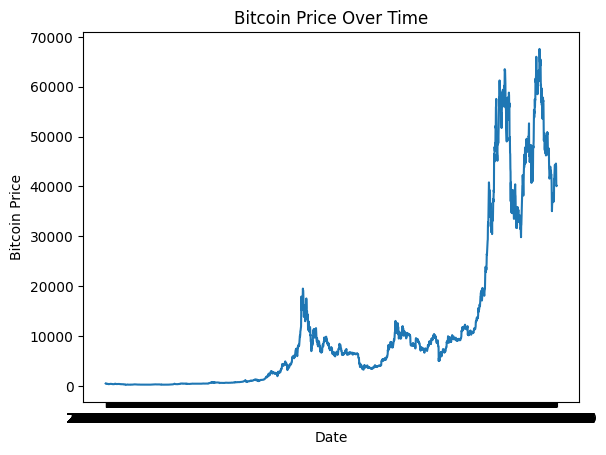

In [ ]:
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Over Time')
plt.show()


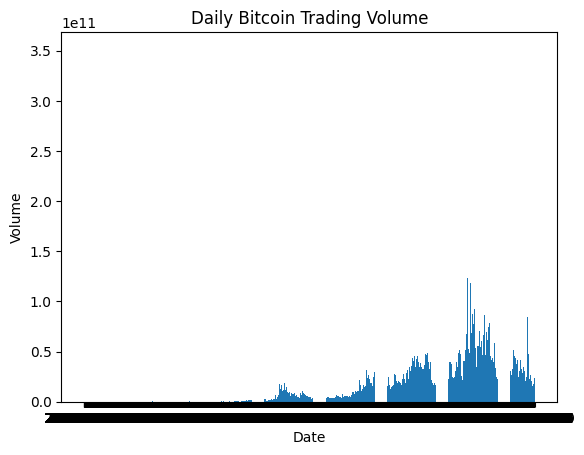

In [ ]:
plt.bar(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Daily Bitcoin Trading Volume')
plt.show()


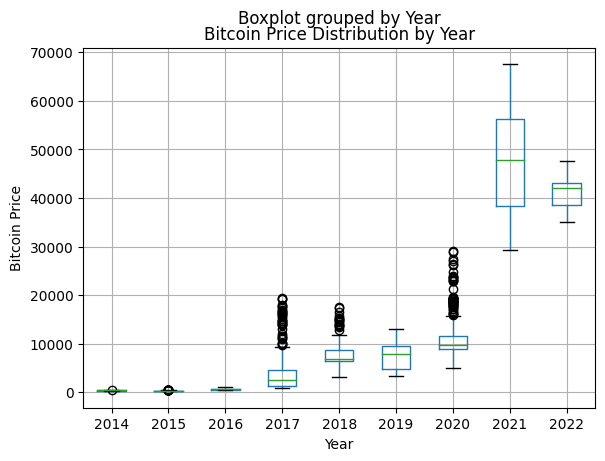

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.boxplot(column='Close', by='Year')
plt.xlabel('Year')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Distribution by Year')
plt.show()


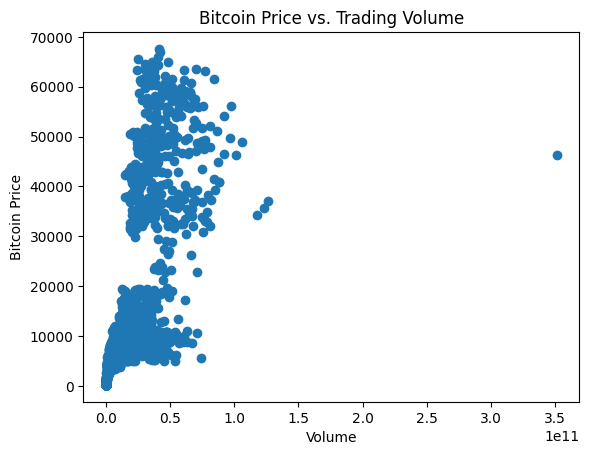

In [ ]:
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price vs. Trading Volume')
plt.show()


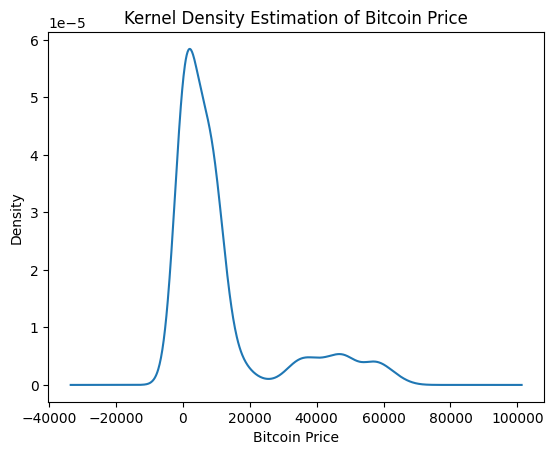

In [ ]:
df['Close'].plot.kde()
plt.xlabel('Bitcoin Price')
plt.title('Kernel Density Estimation of Bitcoin Price')
plt.show()


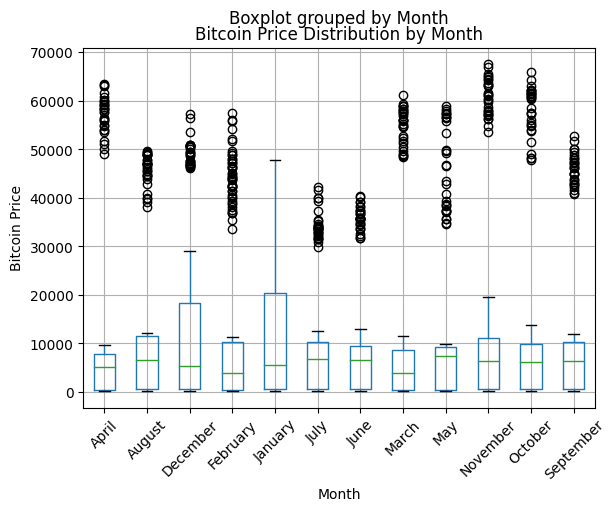

In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df.boxplot(column='Close', by='Month', rot=45)
plt.xlabel('Month')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Distribution by Month')
plt.show()


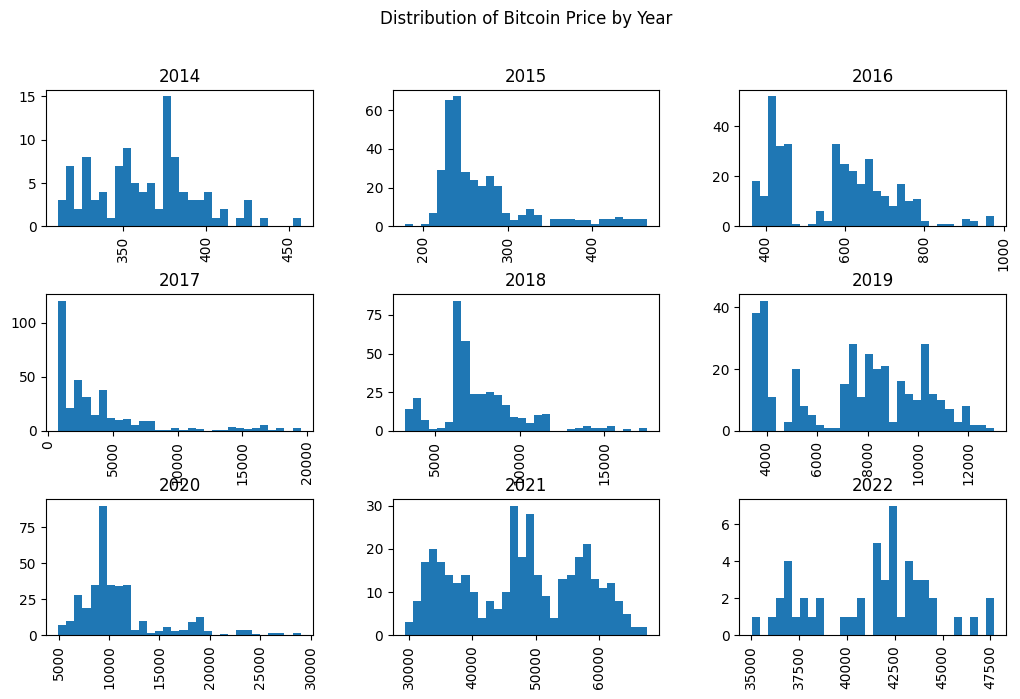

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.hist(column='Close', by='Year', bins=30, layout=(4,3), figsize=(12, 10))
plt.xlabel('Bitcoin Price')
plt.ylabel('Frequency')
plt.suptitle('Distribution of Bitcoin Price by Year')
plt.show()


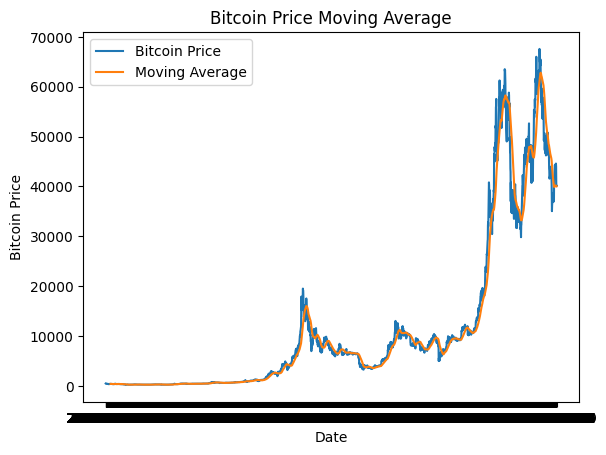

In [ ]:
df['Moving Average'] = df['Close'].rolling(window=30).mean()
plt.plot(df['Date'], df['Close'], label='Bitcoin Price')
plt.plot(df['Date'], df['Moving Average'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Moving Average')
plt.legend()
plt.show()


<ipython-input-42-dd73e8ae7eaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


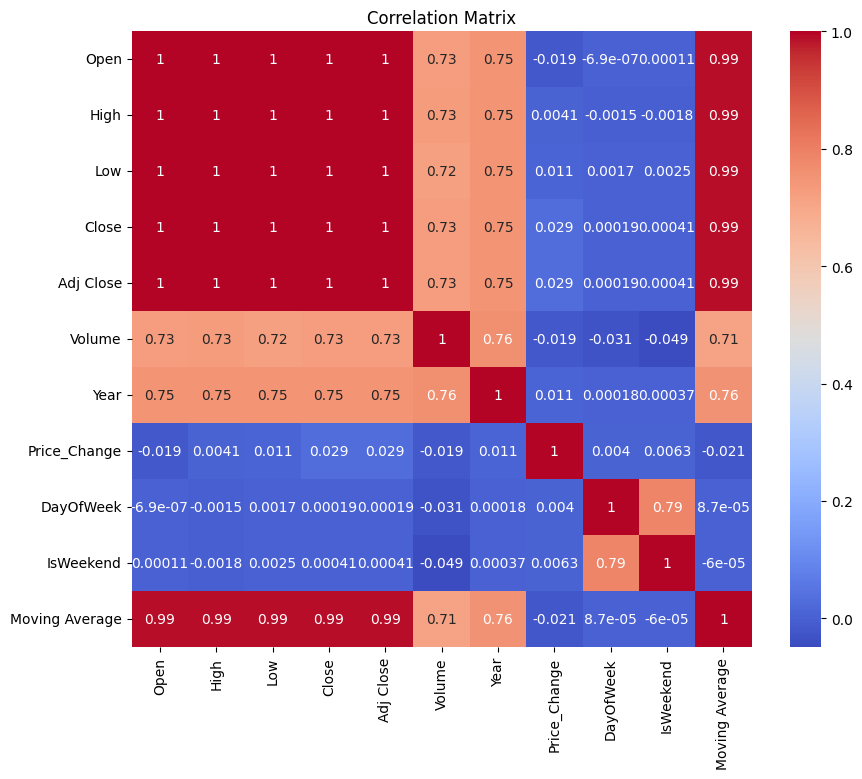

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


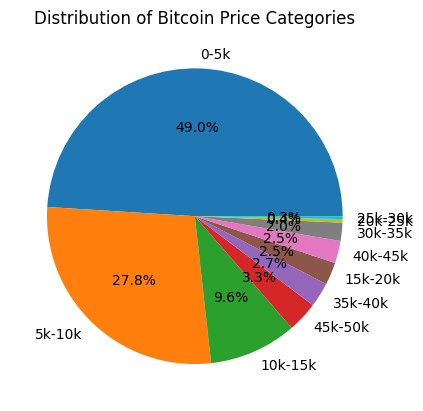

In [ ]:
df['Category'] = pd.cut(df['Close'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k'])
category_counts = df['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Bitcoin Price Categories')
plt.show()


**3. Data Preprocessing**


Check for missing values

Convert 'Date' column to datetime

Extract year, month, and day from 'Date' column

Check for duplicate rows

Check for outliers in 'Close' column

Remove outliers

Normalize 'Close' column using Min-Max scaling



In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extract year, month, and day from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [ ]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [ ]:
# Check for outliers in 'Close' column
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['Close'] < Q1 - 1.5 * IQR) | (df['Close'] > Q3 + 1.5 * IQR))
print("Outliers:", outliers.sum())

Outliers: 421


In [ ]:
# Remove outliers
df = df[~outliers]

In [ ]:
# Normalize 'Close' column using Min-Max scaling
df['Close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())


**4. Feature Engineering**

Calculating the daily percentage change in Bitcoin price using the pct_change() function.

Computing the 7-day rolling mean of the Bitcoin price using the rolling() function with a window size of 7.

Estimating the exponential moving average (EMA) of the Bitcoin price using the ewm() function with a span of 30.

Creating lagged variables by shifting the Bitcoin price by 1 day and 7 days using the shift() function.

Removing rows with missing values after feature engineering using the dropna() function.

In [ ]:
# Step 4: Feature Engineering

# Calculate the daily percentage change in Bitcoin price
df['Price_Change'] = df['Close'].pct_change()

# Calculate the 7-day rolling mean of the Bitcoin price
df['Rolling_Mean'] = df['Close'].rolling(window=7).mean()

# Calculate the exponential moving average of the Bitcoin price
df['EMA'] = df['Close'].ewm(span=30, adjust=False).mean()

# Calculate the lagged variables
df['Lagged_Price_1'] = df['Close'].shift(1)
df['Lagged_Price_7'] = df['Close'].shift(7)

# Drop rows with missing values after feature engineering
df = df.dropna()

# Check the updated dataset
print(df.head())


         Date        Open        High         Low     Close   Adj Close  \
7  2014-09-24  435.751007  436.112000  421.131989  0.010010  423.204987   
8  2014-09-25  423.156006  423.519989  409.467987  0.009535  411.574005   
9  2014-09-26  411.428986  414.937988  400.009003  0.009243  404.424988   
10 2014-09-27  403.556000  406.622986  397.372009  0.009042  399.519989   
11 2014-09-28  399.471008  401.016998  374.332001  0.008130  377.181000   

      Volume  Year  Month  Day  Price_Change  Rolling_Mean       EMA  \
7   30627700  2014      9   24     -0.048842      0.009576  0.010733   
8   26814400  2014      9   25     -0.047454      0.009501  0.010656   
9   21460800  2014      9   26     -0.030621      0.009557  0.010565   
10  15029300  2014      9   27     -0.021673      0.009502  0.010466   
11  23613300  2014      9   28     -0.100891      0.009376  0.010316   

    Lagged_Price_1  Lagged_Price_7  
7         0.010524        0.011403  
8         0.010010        0.010060  
9    

**5. FEATURE SELECTION**

feature selection method called "Feature Importance" using the Random Forest algorithm

     Feature  Importance
3  Adj Close    0.351236
0       Open    0.305884
1       High    0.192743
2        Low    0.150133
4     Volume    0.000004


<BarContainer object of 5 artists>

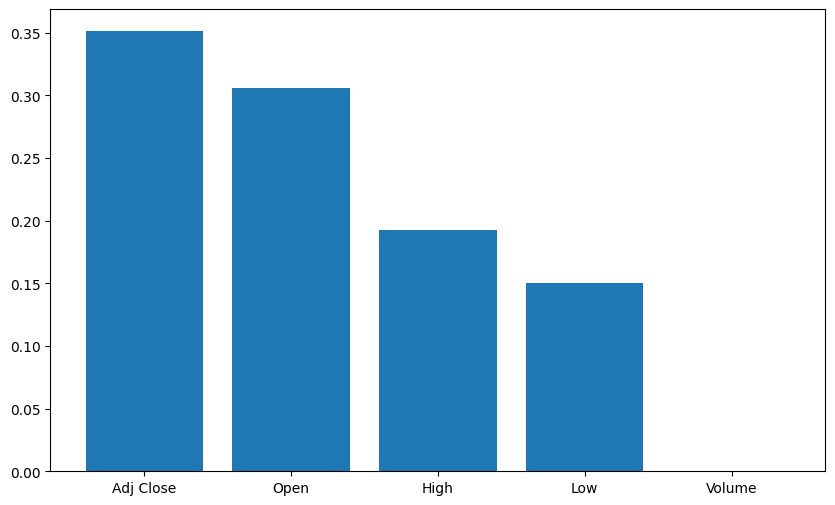

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Drop rows with missing values
df = df.dropna()

# Separate the features and target variable
X = df.drop(['Date', 'Close'], axis=1)
y = df['Close']

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(X_scaled, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])


**6. PCA (Principal Component Analysis)**

**Linear Discriminant Analysis (LDA)**

Explained Variance Ratio: [1.00000000e+00 1.21619624e-12]


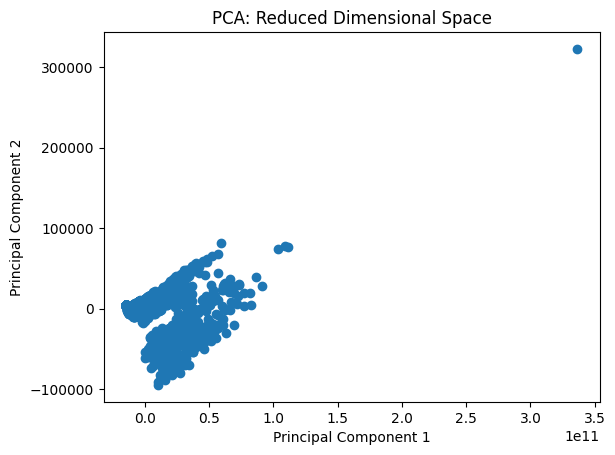

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Preprocess the 'Date' column to extract relevant information
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Separate the features (X) from the target variable (y)
X = df.drop(columns=['Close', 'Date'])
y = df['Close']

# Apply PCA
pca = PCA(n_components=2)  # Set the desired number of components
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the data in the reduced dimensional space
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Reduced Dimensional Space')
plt.show()


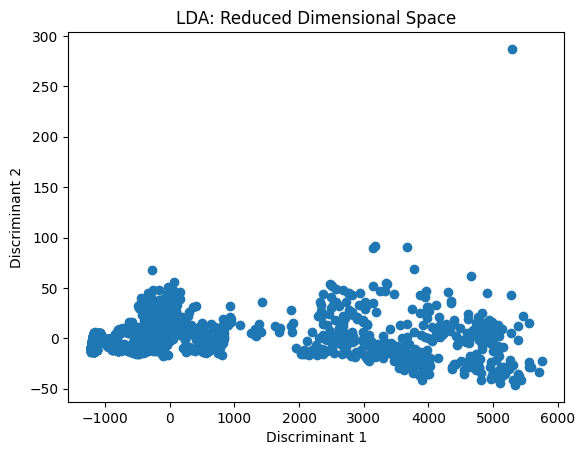

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Preprocess the 'Date' column to extract relevant information
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Separate the features (X) from the target variable (y)
X = df.drop(columns=['Close', 'Date'])
y = df['Close']

# Convert y into categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Set the desired number of components
X_lda = lda.fit_transform(X, y)

# Plot the data in the reduced dimensional space
plt.scatter(X_lda[:, 0], X_lda[:, 1])
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('LDA: Reduced Dimensional Space')
plt.show()


**7.  k-means clustering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the features
features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-means clustering
num_clusters = 3  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataset
df['Cluster'] = clusters

# View the clusters
print(df[['Date', 'Close', 'Cluster']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            Date         Close  Cluster
0     2014-09-17    457.334015        0
1     2014-09-18    424.440002        0
2     2014-09-19    394.795990        0
3     2014-09-20    408.903992        0
4     2014-09-21    398.821014        0
...          ...           ...      ...
2708  2022-02-15  44575.203125        1
2709  2022-02-16  43961.859375        1
2710  2022-02-17  40538.011719        1
2711  2022-02-18  40030.976563        1
2712  2022-02-19  40126.429688        1

[2713 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


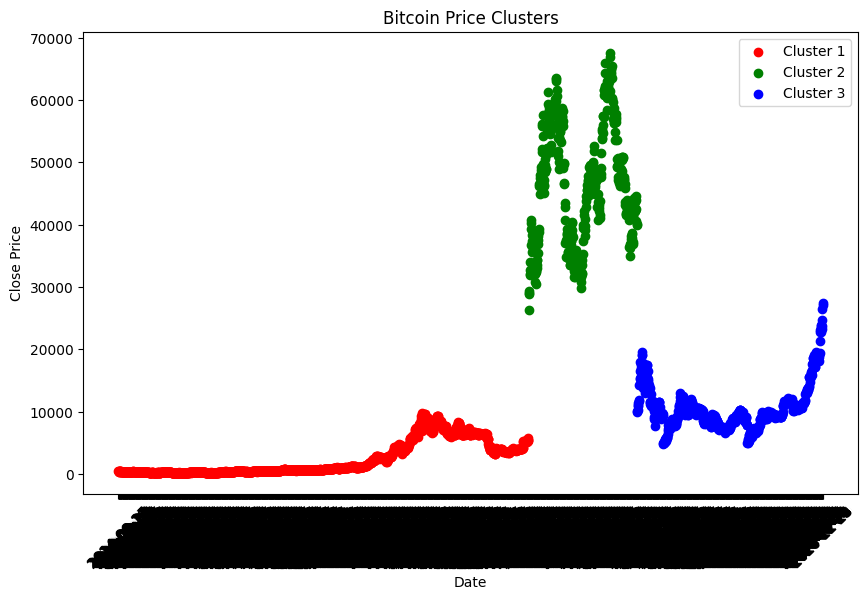

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract the features
features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-means clustering
num_clusters = 3  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataset
df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']  # Assign colors to clusters

# Scatter plot for each cluster
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Date'], cluster_data['Close'], color=colors[cluster_id], label=f'Cluster {cluster_id+1}')

plt.title('Bitcoin Price Clusters')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
